# **Activity 4: Minimum Edit Distance**



**Instructions:**

---
* Please download the provided IPython Notebook (ipynb) file and open it in Google Colab. Once opened, enter your code in the same file directly beneath the relevant question's code block.


* Purpose of this activity is to practice and get hands on experience (Ungraded Activity)  

* No Dataset required for this Activity

Minimum Edit Distance in NLP is the smallest number of operations required to transform one string into another. The allowed operations are insertion, deletion, and substitution of characters. It is commonly used in spell checkers, DNA sequencing, and text similarity tasks.

# Character Based Text Similarity
"As an example, this technology is used by information retrieval systems, search engines, automatic indexing systems, text summarizers, categorization systems, plagiarism checkers, speech recognition, rating systems, DNA analysis, and profiling algorithms (IR/AI programs to automatically link data between people and what they do)."

##Tutorial-1

In [ ]:
# A Naive recursive Python program to find minimum number
# operations to convert str1 to str2

def editDistance(str1, str2, m, n):

    # If first string is empty, the only option is to
    # insert all characters of second string into first
    if m == 0:
        return n

    # If second string is empty, the only option is to
    # remove all characters of first string
    if n == 0:
        return m

    # If last characters of two strings are same, nothing
    # much to do. Ignore last characters and get count for
    # remaining strings.
    if str1[m-1] == str2[n-1]:
        return editDistance(str1, str2, m-1, n-1)

    # If last characters are not same, consider all three
    # operations on last character of first string, recursively
    # compute minimum cost for all three operations and take
    # minimum of three values.
    return 1 + min(editDistance(str1, str2, m, n-1),    # Insert
                   editDistance(str1, str2, m-1, n),    # Remove
                   editDistance(str1, str2, m-1, n-1)    # Replace
                   )

# Driver code
str1 = "sunday"
str2 = "saturday"
print (editDistance(str1, str2, len(str1), len(str2)))

3


It calculates the minimum number of operations (insert, remove, or replace) required to convert one string into another using recursion. It checks if either string is empty (base cases) and, if the last characters match, moves to the next comparison. Otherwise, it recursively considers all three operations and returns the minimum steps needed.

## Task 1
##Assume the cost of insertions is 0 and deletions is 3 and substitution is 1. What is the minimum cost to transform the word "computation" into "education" using the given cost of insertions, deletions, and substitutions?

In [ ]:
## Enter your code here
def min_edit_distance(str1, str2, m, n):
    # Define costs
    INSERT_COST = 0
    DELETE_COST = 3
    REPLACE_COST = 1

    # Create a DP table
    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]

    # Fill the table
    for i in range(m + 1):
        for j in range(n + 1):
            # If first string is empty, insert all characters of second string
            if i == 0:
                dp[i][j] = j * INSERT_COST
            # If second string is empty, remove all characters of first string
            elif j == 0:
                dp[i][j] = i * DELETE_COST
            # If last characters are the same, ignore and move to next
            elif str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(
                    dp[i][j - 1] + INSERT_COST,  # Insert
                    dp[i - 1][j] + DELETE_COST,  # Delete
                    dp[i - 1][j - 1] + REPLACE_COST  # Replace
                )

    return dp[m][n]

# Example usage
str1 = "computation"
str2 = "education"
print("Minimum cost:", min_edit_distance(str1, str2, len(str1), len(str2)))

Minimum cost: 9


The code calculates the minimum cost to transform "computation" into "education" using dynamic programming. It fills a table (dp) where each entry represents the minimum cost to convert a substring of one word into the other, considering insertion (0 cost), deletion (3 cost), and substitution (1 cost). The final answer is stored in dp[m][n].

##Tutorial-2
# The Levenshtein Distance
"This method was invented in 1965 by the Russian Mathematician Vladimir Levenshtein (1935-2017). The distance value describes the minimal number of deletions, insertions, or substitutions that are required to transform one string (the source) into another (the target). Unlike the Hamming distance, the Levenshtein distance works on strings with an unequal length."

SOURCE: [Levenshtein Distance and Text Similarity in Python](https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/)

In [ ]:
import numpy as np
seq1 = 'medicine'
seq2 = 'medical'

# create a matrix
size_x = len(seq1) + 1
size_y = len(seq2) + 1
matrix = np.zeros ((size_x, size_y))
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

The code initializes a 2D matrix using NumPy to compare the words "medicine" and "medical". The matrix has dimensions (len(seq1) + 1) × (len(seq2) + 1), filled with zeros, and will likely be used for operations like edit distance calculation.

The above code creates two string variables named seq1 and seq2 with the values 'medicine' and 'medical', respectively.

Then, the code initializes two integer variables named size_x and size_y with the length of seq1 plus one and the length of seq2 plus one, respectively.

Finally, the code creates a two-dimensional numpy array called matrix with dimensions size_x by size_y, filled with zeros. This matrix can be used to implement the programming algorithm for computing the min edit distance between seq1 and seq2.

In [ ]:
# set col numbers (0, n-1)
for x in range(size_x):
    matrix [x, 0] = x

# set row numbers (0, n-1)
for y in range(size_y):
    matrix [0, y] = y

matrix

array([[0., 1., 2., 3., 4., 5., 6., 7.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 0., 0.],
       [6., 0., 0., 0., 0., 0., 0., 0.],
       [7., 0., 0., 0., 0., 0., 0., 0.],
       [8., 0., 0., 0., 0., 0., 0., 0.]])

The code initializes the first row and first column of the matrix to represent the edit distance when transforming an empty string into prefixes of "medicine" and "medical". The first column is filled with row indices (indicating deletions), and the first row is filled with column indices (indicating insertions).

Above code defines the matrix is initialized with zeros, and its size is defined based on the length of the two input strings seq1 and seq2. Then, the first row and column of the matrix are set to the corresponding indices of the strings, i.e., the distance from an empty string to a substring of the string, which will be used as a base case for computing the distance between two substrings.

In [ ]:
import numpy as np
import pandas as pd


def levenshtein(seq1, seq2):
    # create a matrix
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))

    # set col numbers (0, n-1)
    for x in range(size_x):
        matrix [x, 0] = x

    # set row numbers (0, n-1)
    for y in range(size_y):
        matrix [0, y] = y

    # calculate distance
    for x in range(1, size_x):
        for y in range(1, size_y):
            # if characters match do not increase distance
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = matrix[x-1, y-1]
            # if characters don't match increase min distance by 1
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )

    # print the distance calulation matrix
    # list(seq1) converts string into a list of the characters
    print(pd.DataFrame(matrix[1:,1:], index=list(seq1), columns=list(seq2)))

    return (matrix[size_x - 1, size_y - 1])

levenshtein('medicine','medical')

     m    e    d    i    c    a    l
m  0.0  1.0  2.0  3.0  4.0  5.0  6.0
e  1.0  0.0  1.0  2.0  3.0  4.0  5.0
d  2.0  1.0  0.0  1.0  2.0  3.0  4.0
i  3.0  2.0  1.0  0.0  1.0  2.0  3.0
c  4.0  3.0  2.0  1.0  0.0  1.0  2.0
i  5.0  4.0  3.0  2.0  1.0  1.0  2.0
n  6.0  5.0  4.0  3.0  2.0  2.0  2.0
e  7.0  6.0  5.0  4.0  3.0  3.0  3.0


3.0

The code implements the Levenshtein distance algorithm using a matrix to calculate the minimum number of insertions, deletions, and substitutions required to transform one word into another. It initializes the matrix with row and column indices representing the base cases, then iterates through each character of "medicine" and "medical", updating the matrix based on character matches or mismatches. Finally, it prints the matrix using pandas and returns the final edit distance.

The code above defines a levenshtein function that takes two input strings seq1 and seq2 and calculates the Levenshtein distance between them.

The function first creates a matrix of size (len(seq1) + 1) x (len(seq2) + 1), where each element in the matrix represents the Levenshtein distance between the corresponding prefixes of seq1 and seq2.

It then initializes the first row and column of the matrix with ascending values from 0 to the length of the corresponding string.

The function then iterates through each cell in the matrix, and for each cell, it calculates the minimum of the value to the left, the value above, and the diagonal value, and adds 1 if the characters in seq1 and seq2 are different. The final cell in the matrix represents the Levenshtein distance between the entire seq1 and seq2.

Finally, the function prints the matrix used in the calculation and returns the Levenshtein distance.

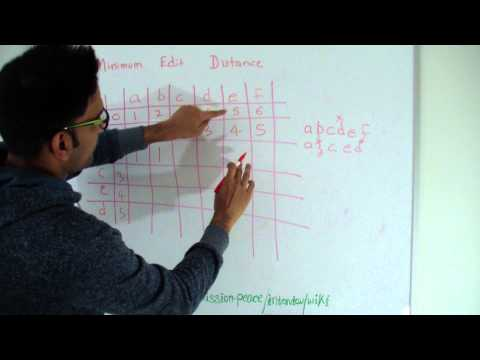

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('We3YDTzNXEk')

##Tutorial-3
# Levenshtein Distance for Sentences

In [ ]:
# Simple Minimum Edit Distance

def min_edit_distance(str1, str2):
    # Create a matrix with dimensions (len(str1)+1) x (len(str2)+1)
    dp = [[0 for _ in range(len(str2) + 1)] for _ in range(len(str1) + 1)]

    # Initialize the first row and column
    for i in range(len(str1) + 1):
        dp[i][0] = i  # Deletion cost
    for j in range(len(str2) + 1):
        dp[0][j] = j  # Insertion cost

    # Fill the matrix
    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # No cost
            else:
                dp[i][j] = min(dp[i - 1][j] + 1,     # Deletion
                               dp[i][j - 1] + 1,     # Insertion
                               dp[i - 1][j - 1] + 1) # Substitution

    return dp[len(str1)][len(str2)]

# Example usage
str1 = "This is a cat"
str2 = "That is a dog"
distance = min_edit_distance(str1, str2)
print(f"The minimum edit distance between '{str1}' and '{str2}' is {distance}.")


The minimum edit distance between 'This is a cat' and 'That is a dog' is 5.


The above code defines a Python function that calculate minimum edit distance between the given source of two strings. The function splits the input strings into lists of words and creates a matrix of zeros with the dimensions, where n and m are the lengths of the source and list of target. Next, the function then populates the matrix with minimum edit distance values using dynamic programming, and returns the minimum edit distance value at the bottom-right corner of the matrix.

##Task 2:
##Calculate the Levenshtein distance between two strings.(10)

String1 = ("Natural language processing")

String2 = ("Computer science department")

In [ ]:
##ENTER YOUR CODE HERE
import numpy as np

def levenshtein_distance(str1, str2):
    m, n = len(str1), len(str2)
    dp = np.zeros((m + 1, n + 1))

    # Initialize base cases
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    # Compute the distance
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # No change if characters match
            else:
                dp[i][j] = min(
                    dp[i - 1][j] + 1,   # Deletion
                    dp[i][j - 1] + 1,   # Insertion
                    dp[i - 1][j - 1] + 1  # Substitution
                )

    return int(dp[m][n])

# Example usage
string1 = "Natural language processing"
string2 = "Computer science department"
print("Levenshtein Distance:", levenshtein_distance(string1, string2))

Levenshtein Distance: 23


The code calculates the Levenshtein distance between two strings using a dynamic programming approach. It fills a matrix where each cell represents the minimum number of insertions, deletions, or substitutions needed to transform one string into the other. The final value in the matrix gives the total edit distance.

##Task 3:
##Write a program that automatically corrects typos and misspellings in a piece of text. The program should use the Levenshtein distance to suggest correction candidates and choose the best correction based on the distance(15)

Print the new Text string after correcting the spellings by finding the nearest word from the word_list for each word.

In [ ]:
#text = "Thes is a smple sntence with sum typos and mispellings."
#word_list = ["this", "is", "a", "simple", "sentence", "with", "some", "typos", "and", "misspellings"]
##Enter your Code
import numpy as np

def levenshtein_distance(str1, str2):
    m, n = len(str1), len(str2)
    dp = np.zeros((m + 1, n + 1))

    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(
                    dp[i - 1][j] + 1,   # Deletion
                    dp[i][j - 1] + 1,   # Insertion
                    dp[i - 1][j - 1] + 1  # Substitution
                )

    return int(dp[m][n])

def correct_text(text, word_list):
    words = text.split()
    corrected_words = []

    for word in words:
        best_match = min(word_list, key=lambda w: levenshtein_distance(word.lower(), w))
        corrected_words.append(best_match)

    return " ".join(corrected_words)

# Example usage
text = "Thes is a smple sntence with sum typos and mispellings."
word_list = ["this", "is", "a", "simple", "sentence", "with", "some", "typos", "and", "misspellings"]
corrected_text = correct_text(text, word_list)
print("Corrected Text:", corrected_text)

Corrected Text: this is a simple sentence with some typos and misspellings


The above code defines three functions:

1) Levenshtein_distance(seq1, seq2) which calculates the Levenshtein distance between two sequences.

2) correct_typo(word, word_list) corrects a single typo in a word, based on a given list of correct words. It calculates the distance between the misspelled word and each word in the list, and returns the closest one.

3) correct_text(text, word_list) corrects typos and misspellings in a text, based on a given list of correct words. It splits the text into words, and applies the correct_typo function to each word. The resulting list of corrected words is joined into a single string.

The program can be tested with the given sample data.